In [1]:
from PIL import Image, ImageFont, ImageDraw, ImageOps
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import photo_processing as pp

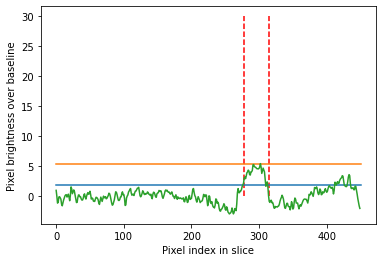

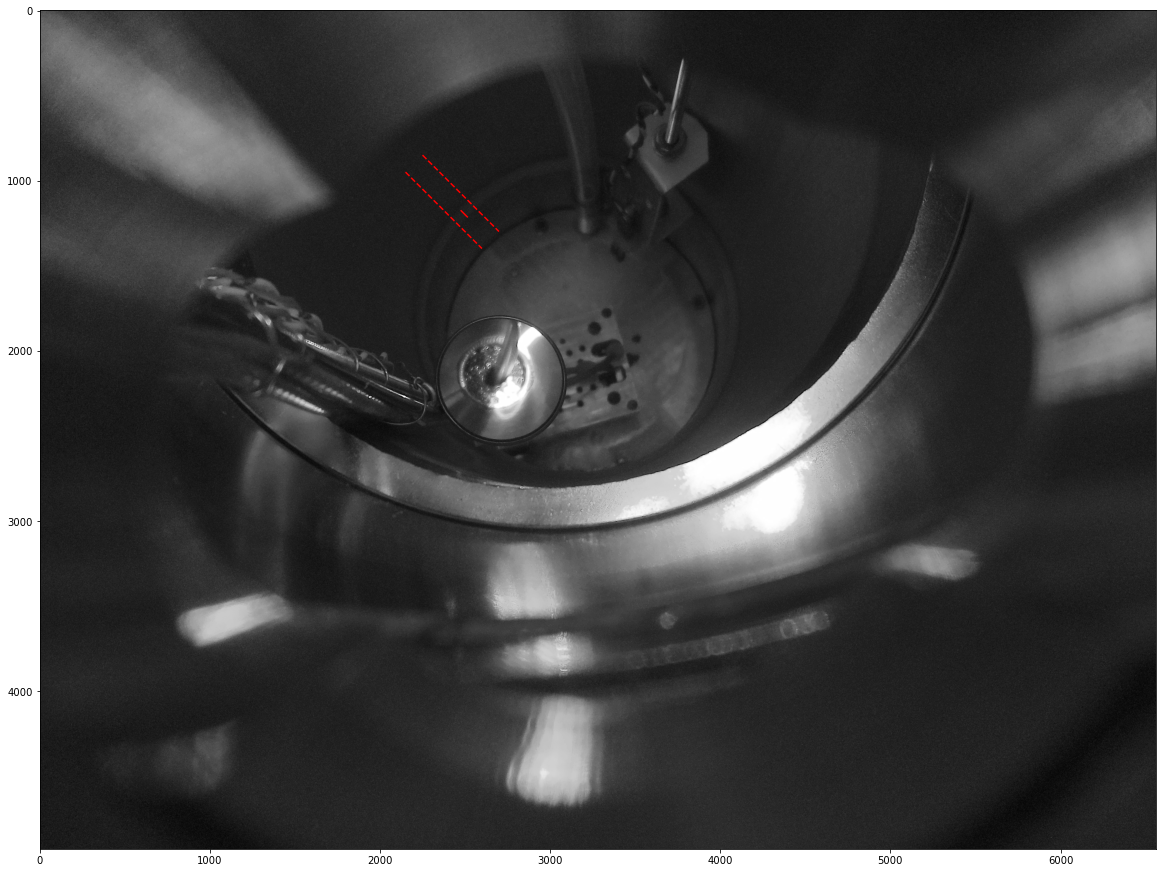

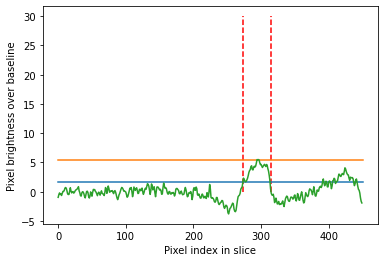

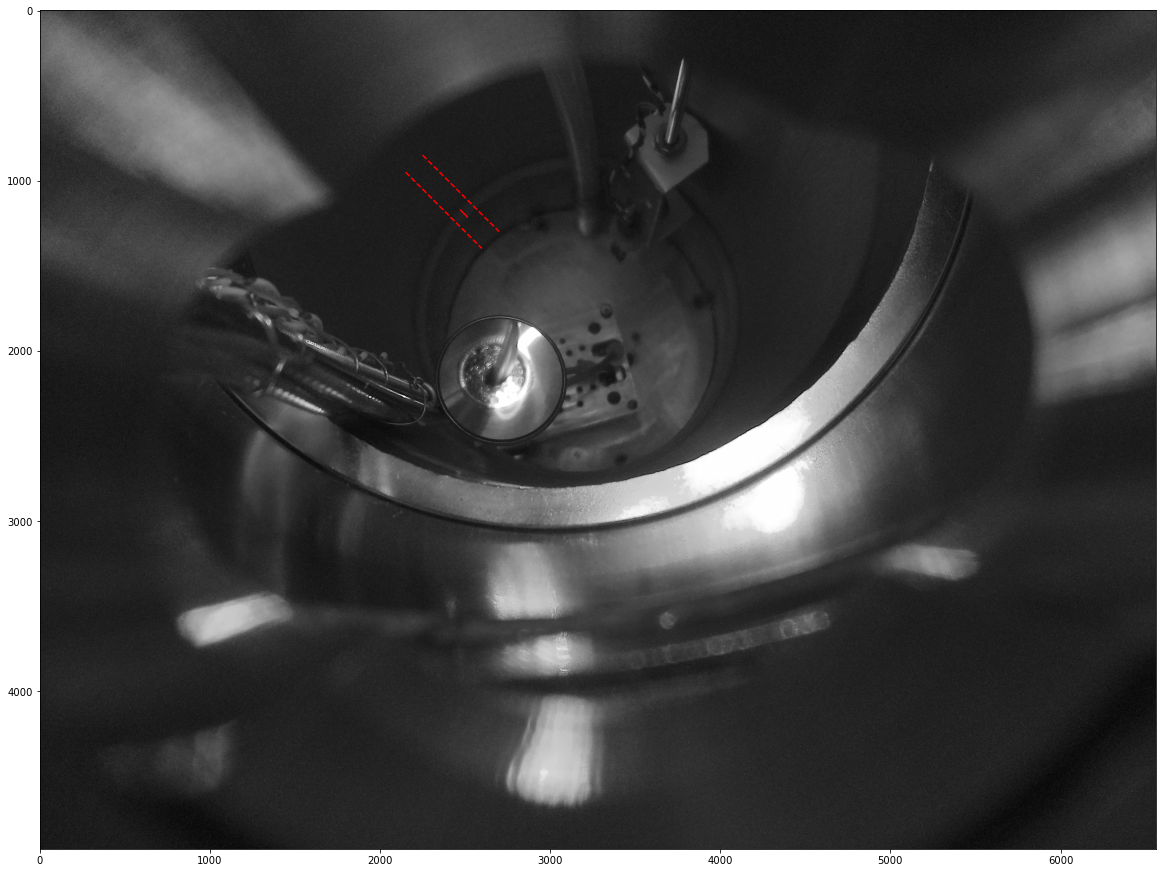

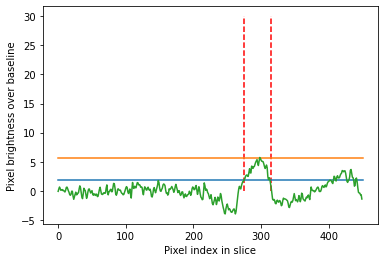

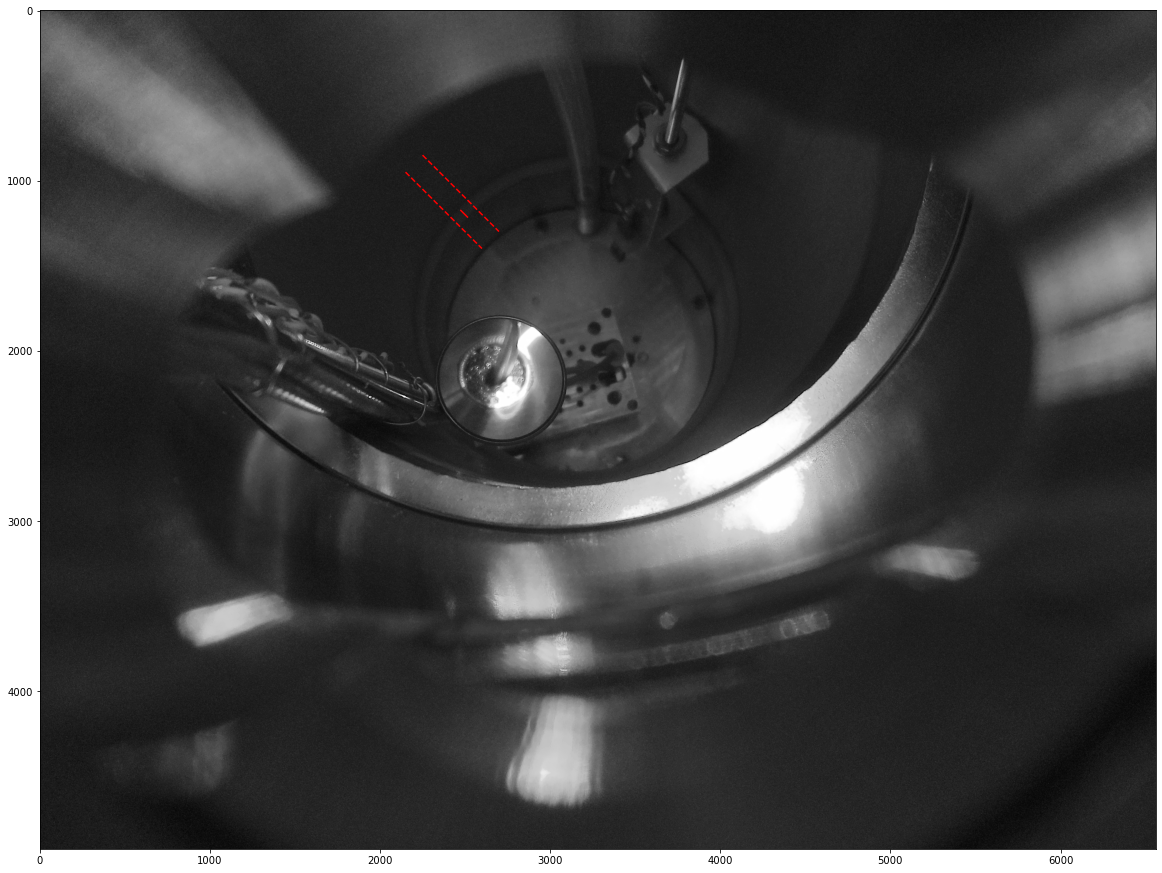

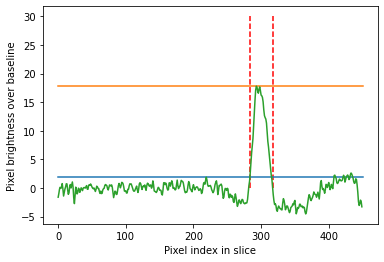

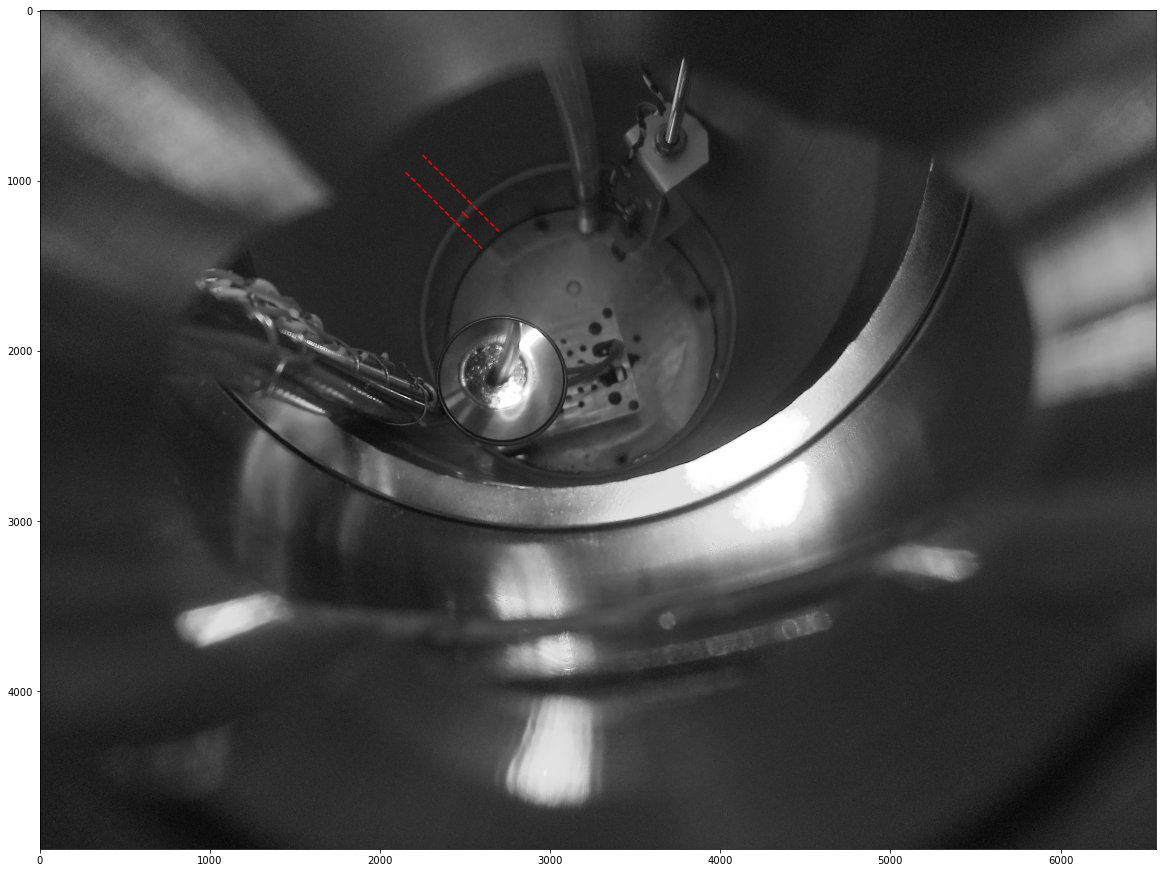

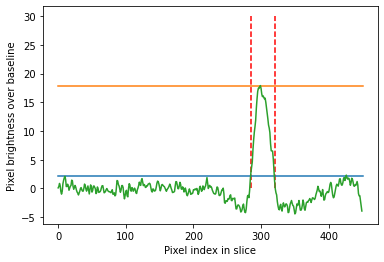

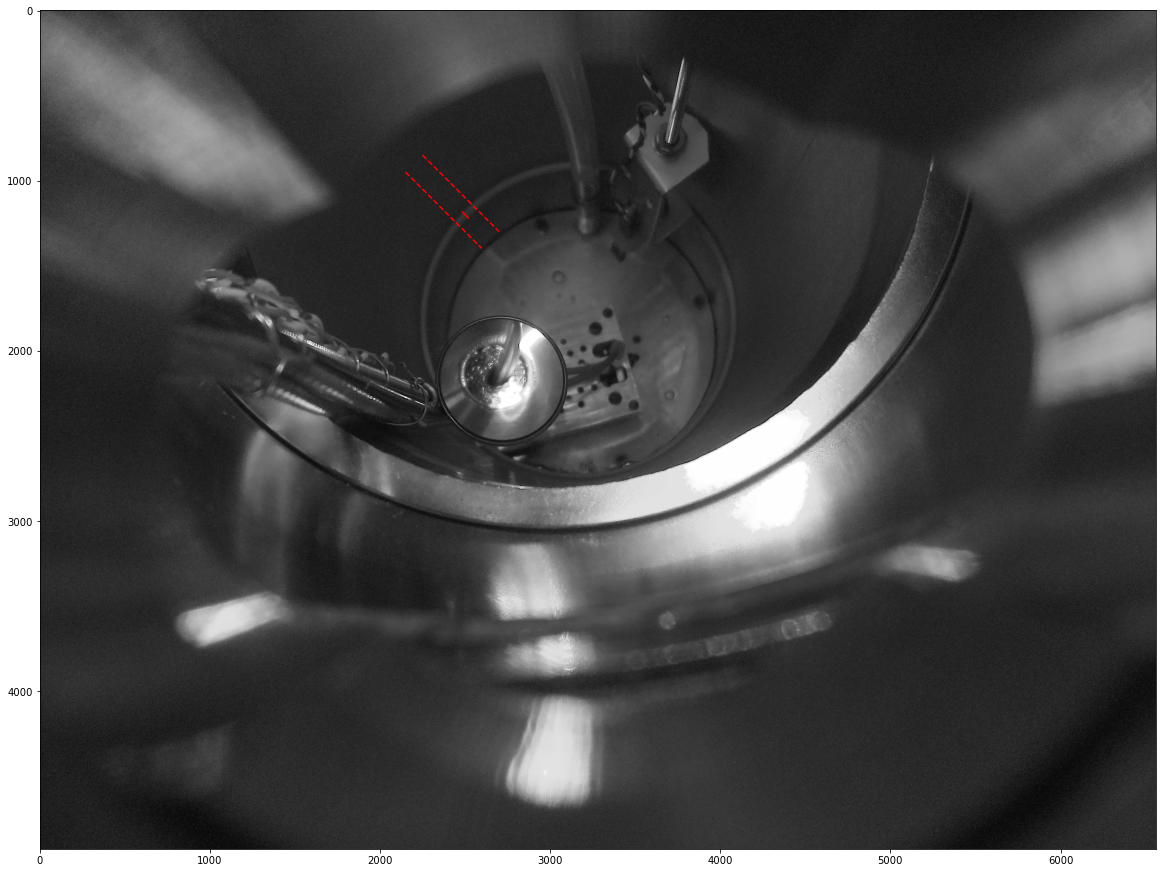

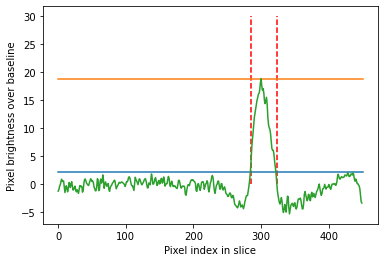

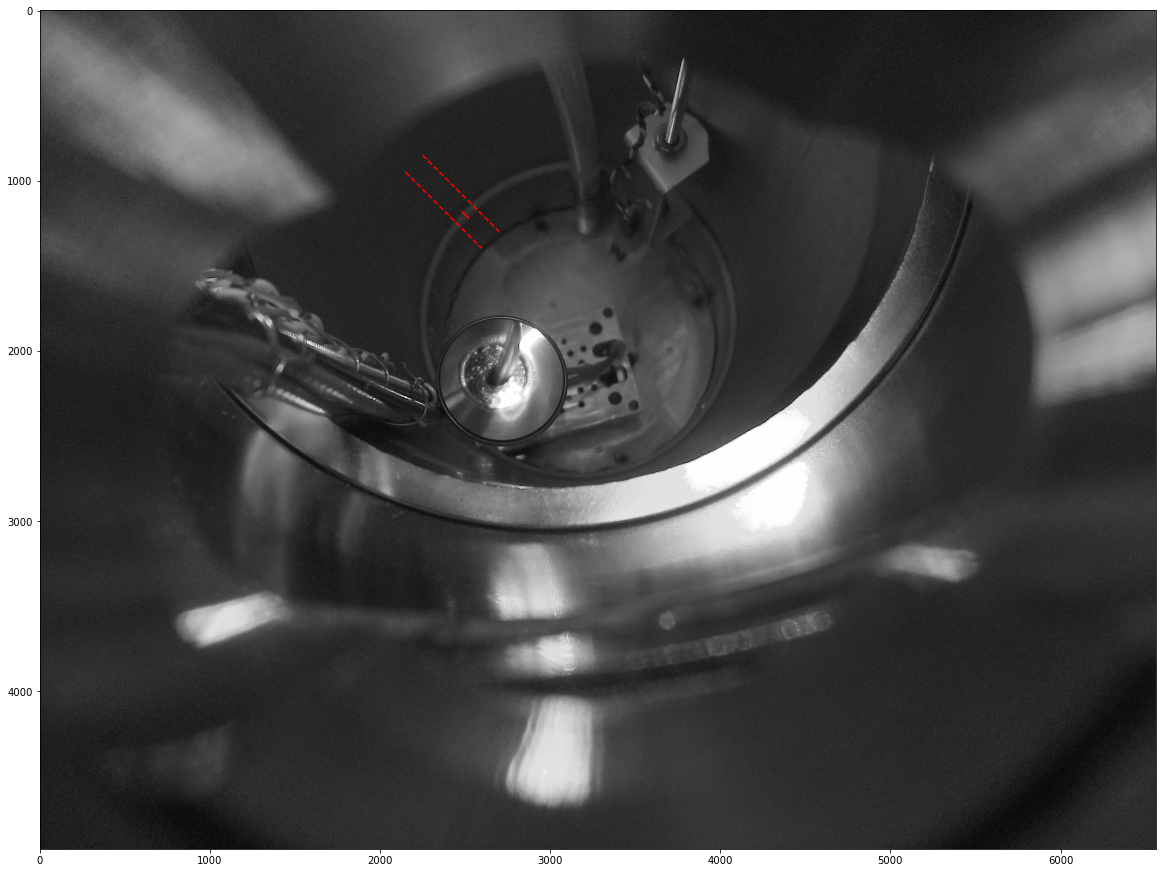

In [28]:
filepath = 'photos/Failed' 

photos = np.zeros((len(os.listdir(filepath)),4928,6560),dtype=np.float)
photo_slices = np.zeros((len(os.listdir(filepath)),450))
datetimes = []

for i in range(len(os.listdir(filepath))): 
    filename = os.listdir(filepath)[i]
    file_datetime = datetime.datetime(int(filename[:4]),int(filename[5:7]),int(filename[8:10]),int(filename[11:13]),int(filename[13:15]),int(filename[15:17]))
    datetimes.append(file_datetime)
    
    photos[i] = np.asarray(Image.open(filepath + '/' + os.listdir(filepath)[i]).convert('L'),dtype=np.float)
    photo_slices[i] = pp.slice_photo(photos[i])
    
baseline, std = pp.leading_baseline(photo_slices,300,0,100)
processed_slices = [photo_slices[i]-baseline[i] for i in range(len(baseline))]


for i in range(len(photo_slices)):
    start, end = pp.std_dev_pulsefinding(processed_slices[i],std[i],300,60,rising_thresh=3.0,falling_thresh=1.0)
    ice_widths.append(end-start)
    
    plt.plot([start,start],
             [0,30],'r--')
    plt.plot([end,end],[0,30],'r--')
    plt.plot(np.arange(450),processed_slices[i])
    plt.xlabel('Pixel index in slice')
    plt.ylabel('Pixel brightness over baseline')
    plt.show()
    
    fig = plt.figure(figsize=(20,30))
    ax = fig.add_subplot(111)
    ax.imshow(photos[i],cmap='gray',clim=(0,255),aspect='equal')
    mid_slice_x = np.arange(2200+start,2200+end)
    mid_slice_y = mid_slice_x - 1300
    plt.plot(mid_slice_x,mid_slice_y,'r')
    slice_x = np.arange(2150,2600)
    slice_y = slice_x - 1200
    plt.plot(slice_x,slice_y,'r--')
    slice_x = np.arange(2250,2700)
    slice_y = slice_x - 1400
    plt.plot(slice_x,slice_y,'r--')

    plt.show()

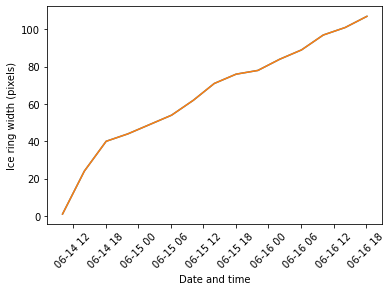

In [21]:
plt.plot(datetimes, ice_widths)
plt.xlabel('Date and time')
plt.ylabel('Ice ring width (pixels)')
plt.xticks(rotation = 45)
plt.show()